In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../../500hits.csv',encoding='latin-1')

In [4]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [6]:
df.drop(['PLAYER','CS'], axis=1, inplace=True)

In [7]:
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [15]:
df['HOF'].value_counts()

HOF
0    313
1    151
2      1
Name: count, dtype: int64

In [17]:
df = df[df['HOF']!=2]
df['HOF'].value_counts()

HOF
0    313
1    151
Name: count, dtype: int64

In [18]:
X = df.iloc[:,:-1]
y = df['HOF']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

### Tuning

In [23]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)

In [29]:
ada = AdaBoostClassifier(estimator=lr, algorithm='SAMME', random_state=42)

In [35]:
param_grid = {
    'estimator__C': np.logspace(-4,4,20),
    'estimator__penalty': ['l1','l2'],
    'n_estimators':[10,25,50],
    'learning_rate':[0.01,0.1,1]
}

In [36]:
gcv = GridSearchCV(ada, param_grid, cv=3, scoring='accuracy', n_jobs=-1, error_score='raise')

In [37]:
gcv.fit(X_train, y_train)

D:\PythonDS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


GridSearchCV(cv=3, error_score='raise',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=LogisticRegression(max_iter=1000,
                                                                       solver='liblinear'),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy')

In [38]:
gcv.best_params_

{'estimator__C': 1438.44988828766,
 'estimator__penalty': 'l1',
 'learning_rate': 0.1,
 'n_estimators': 50}

In [39]:
model = gcv.best_estimator_

In [41]:
train_score = model.score(X_train, y_train)
train_score

0.8598382749326146

In [42]:
test_score = model.score(X_test, y_test)
test_score

0.8387096774193549

### Custom threshold

In [44]:
y_scores = gcv.predict_proba(X_test)[:,1]
y_scores

array([0.88079708, 0.88079708, 0.88079708, 0.11920292, 0.88079708,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.88079708, 0.11920292, 0.88079708, 0.71606847, 0.88079708,
       0.88079708, 0.11920292, 0.11920292, 0.11920292, 0.88079708,
       0.88079708, 0.11920292, 0.88079708, 0.11920292, 0.11920292,
       0.88079708, 0.88079708, 0.11920292, 0.88079708, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.88079708, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.88079708, 0.42846852, 0.11920292, 0.88079708, 0.11920292,
       0.11920292, 0.11920292, 0.88079708, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.88079708, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.88079708, 0.11920292,
       0.88079708, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.88079708, 0.11920292, 0.11920292, 0.11920

In [46]:
fpr, tpr, threshold = roc_curve(y_test, y_scores)

In [47]:
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_index]
optimal_threshold

0.42846851909570705

### Prediction

In [48]:
y_pred = (model.predict_proba(X_test)[:,1]>=optimal_threshold).astype('int')

In [49]:
a_score = accuracy_score(y_test, y_pred)
a_score

0.8494623655913979

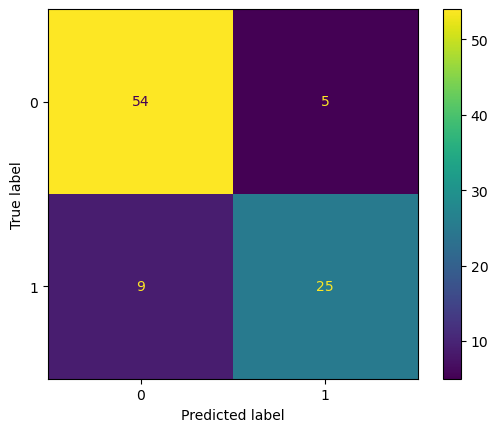

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test ,y_pred))
disp.plot()